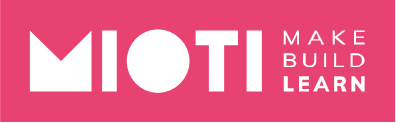
<br/>
<center style="color:#888">Módulo Data Science Advanced<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Óscar Picazo Montoya<br>oscarpm@faculty.mioti.es</center>


# Challenge S2: Aprendiendo a ver en la oscuridad

## Objetivos

El objetivo de este challenge es procesar las imágenes que obtiene una camera de seguridad noctura. Aplicaremos las técnicas que conocemos de procesamiento de imagen para preprocesar las imagenes de entrada.

## Configuración del entorno

In [69]:
%matplotlib inline
#!pip install imageio
#!pip install scikit-image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from skimage import data, io, filters
from skimage.color import rgb2gray

import warnings
warnings.filterwarnings("ignore")

In [70]:
def plot_histogram(img):
    from matplotlib import pyplot as plt
    n_dimensiones = len(img.shape)
    if n_dimensiones == 2: # Solo X,Y
        img_int = 255 * img.flatten()    
        plt.hist(img_int, bins = np.arange(256), color="darkgrey")
        plt.title("Gray scale histogram") 
    elif n_dimensiones == 3: # X,Y y Canal
        if img.shape[2] == 3: # R,G,B
            img_r = img[:,:,0].flatten()        
            img_g = img[:,:,1].flatten()
            img_b = img[:,:,2].flatten()
            
            if img.dtype == np.dtype('uint8'):
                plt.hist(img_r, bins = np.arange(256), color = "red") 
                plt.hist(img_g, bins = np.arange(256), color = "green")
                plt.hist(img_b, bins = np.arange(256), color = "blue")
            else:
                plt.hist(img_r, bins = np.arange(1, step=1/255), color = "red") 
                plt.hist(img_g, bins = np.arange(1, step=1/255), color = "green")
                plt.hist(img_b, bins = np.arange(1, step=1/255), color = "blue")

            plt.title("Color histogram") 
    plt.show()

## Flujo de procesamiento

### 1) En este primer paso carga la imagen (`"img/1.jpg"`) en memoria:

In [71]:
img = io.imread("img/1.jpg")

### 2) ¿Qué dimensiones tiene? ¿En qué espacio de color está?

In [72]:
img.shape
# Esta en el espacio Color RGB, donde cada pixel tiene tres valores de intensidad diferentes, cada uno relativo a un canal (Red/Green/Blue)

(2848, 4256, 3)

### 3) Muestra la imagen en pantalla:

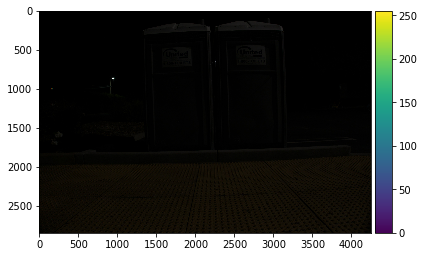

In [73]:
# Para evitar que matplotlib no dibuje la imagen, debemos de incluir siempre la sentencia io.show()
io.imshow(img)
io.show()

### 4) ¿Qué se ve en la imagen?

In [ ]:
### Oscuridad - Todo Negro - Pixeles cercanos a 0 

### 5) Dibuja el histograma y describe la imagen mediante el histograma.

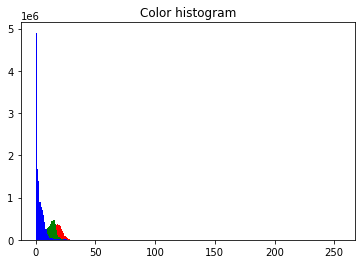

In [74]:
plot_histogram(img)
# En el histograma, vemos que la mayoria de los pixeles se encuentran en la misma zona, muy cercanos a 0, con lo cual
# el resultado es una imagen donde apenas se aprecia nada.

### 6) ¿Se te ocurre alguna manera de mejorar la imagen?

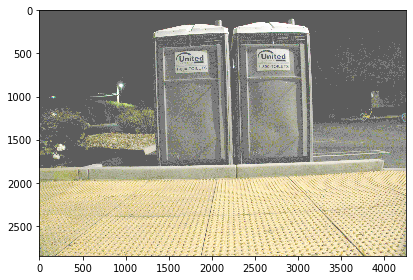

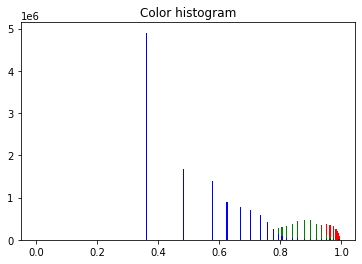

In [102]:
# Mediante equalizacion
from skimage import exposure

img_equalized = exposure.equalize_hist(img)
io.imshow(img_equalized)
io.show()
plot_histogram(img_equalized)

# En este caso el histograma tiende a estar mas uniformemente distribuido.

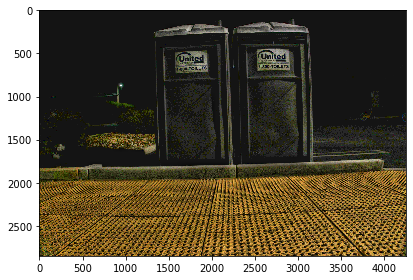

In [88]:
# Mediante equalizacion adaptativa
from skimage import exposure
img_dark_gray_equalized = exposure.equalize_adapthist(img, kernel_size=100,clip_limit=0.08)
io.imshow(img_dark_gray_equalized)
io.show()

### 7) ¿Puedes describir el histograma de la imagen resultante?

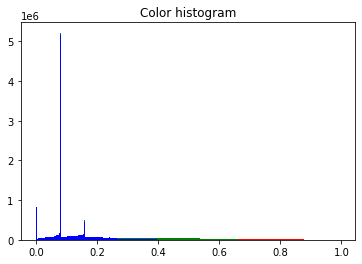

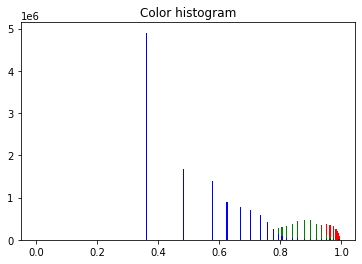

In [107]:
plot_histogram(img_dark_gray_equalized)
plot_histogram(img_equalized)

In [ ]:
# En ambos casos, el conjunto de pixeles, esta distribuido de manera mas uniforme, si bien en el caso
# de la equalizacion adaptativa, se aprecia el efecto de calcular el histograma sobre diferentes regiones de la imagen.

### 8) Obten la imagen de bordes 

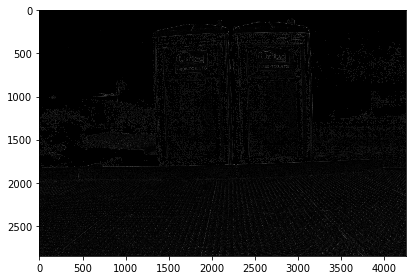

In [95]:
from skimage.filters import sobel,sobel_v,scharr

edge_challenge = sobel(rgb2gray(img_equalized))
io.imshow(edge_challenge)
io.show()

### 9) ¿Se te ocurre alguna manera de mejorarlo?

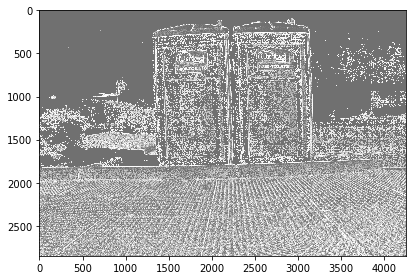

In [96]:
# Dado que tenemos una imagen en la que apenas se ve nada, podemos equalizar los bordes

img_equalized_2 = exposure.equalize_hist(edge_challenge)
io.imshow(img_equalized_2)
io.show()

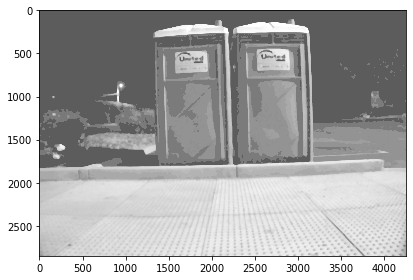

In [104]:
# Se puede apreciar en la imagen de arriba, bastante ruido, una tecnica para difuminar este ruido es la mediana, donde 
# usando un kernel , iremos recorriendo diferentes partes de la matriz original y calculando su mediana. El efecto es 
# una imagen mas difuminada (al tener valores de mediana en cada pixel). Es util, cuando tienes anomalias en las fotos,
# por ejemplo, puntos rojos, etc , porque al aplicar la mediana, esas anomalias desaparecen.
from skimage.filters import median
median_challenge_median = median(rgb2gray(img_equalized),disk(15))
io.imshow(median_challenge_median)
io.show()

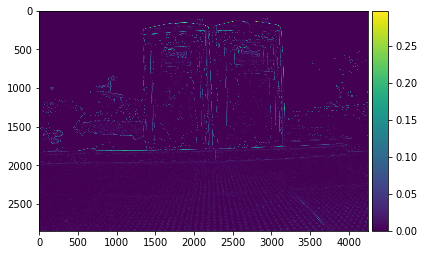

In [105]:
# Aplicamos convulucion (sobel) para obtencion de bordes, y vemos que nos devuelve un mapa de calor.
sobel_edge_challenge = sobel(rgb2gray(median_challenge_median))
io.imshow(sobel_edge_challenge)
io.show()

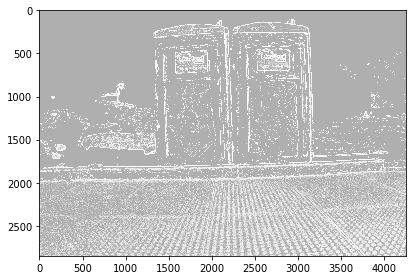

In [106]:
# Una vez mas , podemos aplicar una equalizacion para obtener una imagen mas nitida.
img_equalized_final = exposure.equalize_hist(sobel_edge_challenge)
io.imshow(img_equalized_final)
io.show()

### 10) ¿Podrías describir un pipeline típico de trabajo?. Con lo que ya sabes reordena los pasos anteriores y describe como obtendrías una buena imagen de bordes.

In [ ]:
# El primer paso del pipeline seria cargar la imagen y visualizarla
# Si la imagen no se visualiza correctamene, aplicar tecnicas de equalizacion de imagenes.
    # - Podemos optar por una equalizacion simple, donde los pixeles seran distribuidos de la manera mas equitativa posible
    # - Podemos optar por una equalizacion un poco mas inteligente, donde se tengan en cuenta diferentes regiones de la imagen.
# El siguiente paso en el pipeline seria la extraccion de bordes de la imagen.
    # Se usan tecnicas convolutivas ya definidas en la libreria (i.e sobel)
    # En caso de ver "ruido" en la imagen, la manera de atenuarlo, puede ser emplear la tecnica de la mediana.
    # Si despues de eliminar el ruido , la imagen no es nitida y los bordes no se aprecian claramente, se vuelve a aplicar equalizacion.

# Basicamente, es ir explorando la imagen luego de aplicar tecnicas de correcion, hasta obtener el resultado deseado.